## Module 3 - Introduction to Neural Network Framework - Assignment
#### by Gaurav Singh (grv08singh@gmail.com)

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.regularizers import l2

import warnings as wr
wr.filterwarnings('ignore')

### Objectives:

* Data Preprocessing: __Prepare__ the MNIST dataset for training and testing the neural network model. This includes __normalization__ of image pixel values and __converting__ the output labels to a one-hot encoded format.

In [2]:
(X_train,y_train),(X_test,y_test) = tfk.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

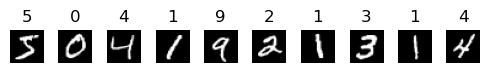

In [4]:
n = 10
fig,ax=plt.subplots(1,n,figsize=(5,2))
for i in range(n):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].set_title(y_train[i])
    ax[i].axis('off')
fig.tight_layout()
fig.show()

In [5]:
mx = []
mn = []
for i in range(X_train.shape[0]):
    mx.append(X_train[i].max())
    mn.append(X_train[i].min())
print(f"max = {max(mx)}")
print(f"min = {min(mn)}")

max = 255
min = 0


##### Scaling data - minimum=0, maximum=255

In [6]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

##### checking class imbalance

In [8]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [9]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

##### data is fairly balanced

##### applying __one hot encoding__ on y_train and y_test

In [10]:
num_classes = 10
y_train_ohe = to_categorical(y_train, num_classes)
y_test_ohe = to_categorical(y_test, num_classes)

In [11]:
y_train_ohe.shape

(60000, 10)

In [12]:
y_test_ohe.shape

(10000, 10)

* Model Development: __Create__ a neural network model capable of classifying 28x28 pixel grayscale images of handwritten digits. The model should have an __input layer__, one or more __hidden layers__, and an __output layer__.

In [161]:
model = Sequential()
model.add(Flatten(input_shape=X_train_scaled.shape[1:]))
model.add(Dense(128, 'relu'))
model.add(Dense(128, 'relu'))
model.add(Dense(10, 'softmax'))

In [162]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_15 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

* Training: __Train__ the neural network model using the preprocessed training data. Utilize __categorical cross-entropy__ as the loss function, __stochastic gradient descent__ as the __optimizer__, and __track accuracy__ as a performance metric.

In [163]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [164]:
history = model.fit(X_train_scaled, y_train_ohe, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8392 - loss: 0.6159
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9152 - loss: 0.2945
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9308 - loss: 0.2429
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9404 - loss: 0.2083
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9477 - loss: 0.1825
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9545 - loss: 0.1621
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9582 - loss: 0.1460
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9625 - loss: 0.1331
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9653 - loss: 0.1219
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9675 - loss: 0.1127
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9702 - loss: 0.1042
Epoch 12/20
1875/1875 ━━━━━━━━

* Evaluation: __Evaluate__ the performance of the trained model using the testing dataset, __ensuring__ that the model generalizes well to unseen data.

In [165]:
model.evaluate(x=X_test, y=y_test_ohe)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9723 - loss: 14.4322    


[14.432239532470703, 0.9722999930381775]

* Prediction: __Implement functionality__ to make predictions on single images or batches of images, returning the digit class with the highest probability

In [166]:
#make prediction on a single image
random_ix = np.random.randint(0,X_test.shape[0],1)[0]
y_pred = model.predict(x=X_test[random_ix,:,:].reshape(1,28,28))
print(f"Prediction : {np.argmax(y_pred)}")
print(f"Actual     : {y_test[random_ix]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Prediction : 2
Actual     : 2


In [168]:
#make prediction on a batch of n images
n = 30
random_ix = np.random.randint(0,X_test.shape[0],n)
y_pred = model.predict(x=X_test[random_ix,:,:])
y_pred_int = np.array([np.argmax(yy) for yy in y_pred])
print(f"Prediction : {y_pred_int}")
print(f"Actual     : {y_test[random_ix]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Prediction : [5 4 1 2 0 1 7 9 5 8 1 6 0 1 6 5 6 0 8 1 6 4 2 1 6 5 6 7 3 1]
Actual     : [5 4 1 3 0 1 7 9 5 8 1 6 0 1 6 5 6 0 8 1 6 4 2 1 6 5 6 7 3 1]


* Analysis: __Analyze__ the results, __understand__ the model's performance, and __explore__ ways to improve it if necessary

#### Analysis & understanding
* With 128 neurons in each of the hidden layer 1 and hidden layer 2,
* 118,282 total trainable parameters, optimizer as SGD,
* Loss as Categorical CrossEntropy with Target column One Hot Encoded,
* Training Accuracy = 98.32% and Test Accuracy = 97.23%.
* There seems to be a __slight overfitting__ in the model.
* The model seems to be __strong in Generalization.__

#### Exploring further to reduce overfitting:
* Using __l2 regularization__,
* Using __20% dropout__ after each hidden dense layer,
* Using __adam optimizer__.

In [176]:
l2_rate = 0.001
model = Sequential([
    Flatten(input_shape=X_train_scaled.shape[1:]),
    Dense(128,activation='relu',kernel_regularizer=l2(l2_rate)),
    Dropout(0.2),
    Dense(128,activation='relu',kernel_regularizer=l2(l2_rate)),
    Dropout(0.2),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train_ohe, batch_size=32, epochs=20, validation_data=(X_test_scaled, y_test_ohe))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9036 - loss: 0.5186 - val_accuracy: 0.9522 - val_loss: 0.3176
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9447 - loss: 0.3219 - val_accuracy: 0.9453 - val_loss: 0.2966
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9519 - loss: 0.2827 - val_accuracy: 0.9663 - val_loss: 0.2329
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9559 - loss: 0.2651 - val_accuracy: 0.9680 - val_loss: 0.2194
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9563 - loss: 0.2582 - val_accuracy: 0.9689 - val_loss: 0.2187
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9587 - loss: 0.2496 - val_accuracy: 0.9712 - val_loss: 0.2076
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9594 - loss: 0.2480 - val_accuracy: 0.9709 - val_loss: 0.2097
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9598 - loss: 0.2443 - 

#### Now, Training accuracy = 96.11% and Test accuracy = 97.10%
#### Overfitting has been reduced.